In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn
import os
import pprint

# Observations:
1 - After applying the Vader Sentiment Analysis in 5 very popular media organizations, we were able to identify tweets and analyze the feedback that these organizations have been receiving from their followers.
2 - While analyzing the last 100 most recent tweets from each organization, we realize that the majority of these tweets have a neutral feedback, as the first plot shows below.
3 - When analyzing the overall feedback, CNN and Fox have an overall negative feedback from followers; while BBC, CBS and New York Times have a positive overall feedback. 

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
api_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))))
file_name = os.path.join(api_dir, "C:/Users/gpalv/Desktop/KU BootCamp Homework/Api_Keys/Google_api_key.json")
data = json.load(open(file_name))

In [4]:
consumer_key = data['twitter_consumer_api_key']
consumer_secret = data['twitter_consumer_secret_api_key']
access_token = data['twitter_access_token_api_key']
access_token_secret = data['twitter_access_token_secret_api_key']

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
target_terms = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")
sentiment_array = []

In [7]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
target_channel = []
date = []
channels_text_list = []
text = ''

for target in target_terms:
    time.sleep(5)
    public_tweets = api.user_timeline(target, count=101)
                    
    for tweet in public_tweets:
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        #pprint.pprint(public_tweets)

        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        oldest_tweet = tweet["id_str"]

        sentiment = {'User': target,
                     'Compound': np.mean(compound_list),
                     'Positive': np.mean(positive_list),
                     'Neutral': np.mean(negative_list),
                     'Negative': np.mean(neutral_list),
                     'Tweet Count': len(compound_list)}
        date.append(tweet["created_at"])
        target_channel.append(target)
        channels_text_list.append(tweet["text"])
        print(sentiment)
        print('')

{'User': '@BBC', 'Compound': 0.55740000000000001, 'Positive': 0.19400000000000001, 'Neutral': 0.0, 'Negative': 0.80600000000000005, 'Tweet Count': 1}

{'User': '@BBC', 'Compound': 0.2787, 'Positive': 0.097000000000000003, 'Neutral': 0.0, 'Negative': 0.90300000000000002, 'Tweet Count': 2}

{'User': '@BBC', 'Compound': 0.33873333333333333, 'Positive': 0.16466666666666666, 'Neutral': 0.0, 'Negative': 0.83533333333333337, 'Tweet Count': 3}

{'User': '@BBC', 'Compound': 0.25405, 'Positive': 0.1235, 'Neutral': 0.0, 'Negative': 0.87650000000000006, 'Tweet Count': 4}

{'User': '@BBC', 'Compound': 0.35026000000000002, 'Positive': 0.1444, 'Neutral': 0.0, 'Negative': 0.85560000000000014, 'Tweet Count': 5}

{'User': '@BBC', 'Compound': 0.29188333333333333, 'Positive': 0.12033333333333333, 'Neutral': 0.0, 'Negative': 0.87966666666666671, 'Tweet Count': 6}

{'User': '@BBC', 'Compound': 0.32055714285714287, 'Positive': 0.12685714285714286, 'Neutral': 0.0, 'Negative': 0.87314285714285711, 'Tweet Count

{'User': '@CBS', 'Compound': 0.12391274509803919, 'Positive': 0.096598039215686271, 'Neutral': 0.048843137254901962, 'Negative': 0.8545686274509805, 'Tweet Count': 102}

{'User': '@CBS', 'Compound': 0.12270970873786405, 'Positive': 0.095660194174757282, 'Neutral': 0.048368932038834953, 'Negative': 0.855980582524272, 'Tweet Count': 103}

{'User': '@CBS', 'Compound': 0.12227211538461538, 'Positive': 0.095903846153846159, 'Neutral': 0.048923076923076923, 'Negative': 0.85518269230769228, 'Tweet Count': 104}

{'User': '@CBS', 'Compound': 0.12110761904761905, 'Positive': 0.094990476190476195, 'Neutral': 0.048457142857142858, 'Negative': 0.85656190476190475, 'Tweet Count': 105}

{'User': '@CBS', 'Compound': 0.12140943396226415, 'Positive': 0.095207547169811321, 'Neutral': 0.048000000000000001, 'Negative': 0.85680188679245284, 'Tweet Count': 106}

{'User': '@CBS', 'Compound': 0.12027476635514019, 'Positive': 0.094317757009345804, 'Neutral': 0.047551401869158877, 'Negative': 0.85814018691588778

{'User': '@CNN', 'Compound': 0.2298024752475247, 'Positive': 0.13743564356435645, 'Neutral': 0.038851485148514851, 'Negative': 0.82370792079207922, 'Tweet Count': 202}

{'User': '@CNN', 'Compound': 0.22804482758620687, 'Positive': 0.13675862068965516, 'Neutral': 0.03957142857142857, 'Negative': 0.82366502463054192, 'Tweet Count': 203}

{'User': '@CNN', 'Compound': 0.23049019607843135, 'Positive': 0.13744117647058821, 'Neutral': 0.039377450980392158, 'Negative': 0.82317647058823529, 'Tweet Count': 204}

{'User': '@CNN', 'Compound': 0.229990243902439, 'Positive': 0.13748292682926827, 'Neutral': 0.039799999999999995, 'Negative': 0.82271707317073162, 'Tweet Count': 205}

{'User': '@CNN', 'Compound': 0.22887378640776698, 'Positive': 0.13681553398058252, 'Neutral': 0.039606796116504847, 'Negative': 0.82357766990291259, 'Tweet Count': 206}

{'User': '@CNN', 'Compound': 0.22546521739130429, 'Positive': 0.1365990338164251, 'Neutral': 0.040236714975845411, 'Negative': 0.8231642512077294, 'Tweet 

{'User': '@FoxNews', 'Compound': 0.12477161716171617, 'Positive': 0.10648184818481847, 'Neutral': 0.050712871287128709, 'Negative': 0.84280528052805281, 'Tweet Count': 303}

{'User': '@FoxNews', 'Compound': 0.12234671052631578, 'Positive': 0.10613157894736841, 'Neutral': 0.051368421052631577, 'Negative': 0.84250000000000003, 'Tweet Count': 304}

{'User': '@FoxNews', 'Compound': 0.12214524590163935, 'Positive': 0.1064032786885246, 'Neutral': 0.051786885245901637, 'Negative': 0.8418098360655738, 'Tweet Count': 305}

{'User': '@FoxNews', 'Compound': 0.1204326797385621, 'Positive': 0.10605555555555557, 'Neutral': 0.052117647058823532, 'Negative': 0.84182679738562083, 'Tweet Count': 306}

{'User': '@FoxNews', 'Compound': 0.11808794788273616, 'Positive': 0.10571009771986972, 'Neutral': 0.052657980456026057, 'Negative': 0.84163192182410418, 'Tweet Count': 307}

{'User': '@FoxNews', 'Compound': 0.11770454545454545, 'Positive': 0.10536688311688312, 'Neutral': 0.052487012987012985, 'Negative': 0

{'User': '@nytimes', 'Compound': 0.091235396039603955, 'Positive': 0.097264851485148518, 'Neutral': 0.058324257425742571, 'Negative': 0.84440594059405938, 'Tweet Count': 404}

{'User': '@nytimes', 'Compound': 0.091901975308641956, 'Positive': 0.097325925925925927, 'Neutral': 0.058180246913580244, 'Negative': 0.84448888888888884, 'Tweet Count': 405}

{'User': '@nytimes', 'Compound': 0.092291379310344812, 'Positive': 0.097411330049261086, 'Neutral': 0.058241379310344829, 'Negative': 0.84433990147783256, 'Tweet Count': 406}

{'User': '@nytimes', 'Compound': 0.092064619164619152, 'Positive': 0.097171990171990172, 'Neutral': 0.058098280098280101, 'Negative': 0.84472235872235879, 'Tweet Count': 407}

{'User': '@nytimes', 'Compound': 0.0918389705882353, 'Positive': 0.096933823529411767, 'Neutral': 0.05795588235294117, 'Negative': 0.84510294117647045, 'Tweet Count': 408}

{'User': '@nytimes', 'Compound': 0.091614425427872861, 'Positive': 0.096696821515892414, 'Neutral': 0.057814180929095349, '

In [8]:
news_mood = pd.DataFrame({"Source Account" :target_channel, "Text" :channels_text_list, "Date" :date, "Compound" :compound_list,
                         "Positive" :positive_list, "Neutral" :neutral_list, "Negative" :negative_list},
                        columns=["Source Account", "Date", "Compound", "Positive", "Neutral", 
                                 "Negative", "Text"])
news_mood.head()

,Source Account,Date,Compound,Positive,Neutral,Negative,Text
0,@BBC,Wed Feb 07 14:32:05 +0000 2018,0.5574,0.194,0.806,0.0,💸 From @MichaelJackson's ranch to @Courtney Lo...
1,@BBC,Wed Feb 07 14:18:40 +0000 2018,0.0000,0.000,1.000,0.0,RT @BBCOne: This is going to be EPIC.\n\n#Troy...
2,@BBC,Wed Feb 07 14:00:11 +0000 2018,0.4588,0.300,0.700,0.0,"Welcome to Monowi, Nebraska. \n\nPopulation 1...."
3,@BBC,Wed Feb 07 13:30:07 +0000 2018,0.0000,0.000,1.000,0.0,🐧🌨Some of these little penguins are seeing sno...
4,@BBC,Wed Feb 07 13:15:33 +0000 2018,0.7351,0.228,0.772,0.0,RT @TWBBC: Zebro here could soon revolutionise...


In [9]:
news_mood.to_csv('file.csv', index=False)

In [10]:
news_mood.rename(columns = {"Source Account":"Source_Account"}, inplace=True)

In [11]:
news_mood.head(3)

,Source_Account,Date,Compound,Positive,Neutral,Negative,Text
0,@BBC,Wed Feb 07 14:32:05 +0000 2018,0.5574,0.194,0.806,0.0,💸 From @MichaelJackson's ranch to @Courtney Lo...
1,@BBC,Wed Feb 07 14:18:40 +0000 2018,0.0000,0.000,1.000,0.0,RT @BBCOne: This is going to be EPIC.\n\n#Troy...
2,@BBC,Wed Feb 07 14:00:11 +0000 2018,0.4588,0.300,0.700,0.0,"Welcome to Monowi, Nebraska. \n\nPopulation 1...."


In [12]:
bbc = news_mood[(news_mood.Source_Account == "@BBC")]
cbs = news_mood[(news_mood.Source_Account == "@CBS")]
cnn = news_mood[(news_mood.Source_Account == "@CNN")]
fox = news_mood[(news_mood.Source_Account == "@FoxNews")]
nyt = news_mood[(news_mood.Source_Account == "@nytimes")]

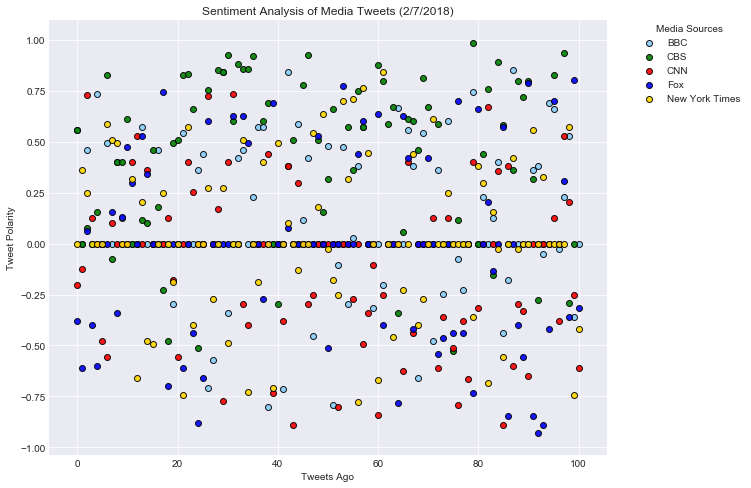

In [17]:
color = ['lightskyblue', 'green', 'red', 'blue', 'gold']

with plt.style.context("seaborn-darkgrid"):
    plt.figure(figsize=(10,8))
    plt.scatter(x=np.arange(len(bbc['Compound'])), y=bbc["Compound"], color=color[0], 
    marker='o', alpha=.9, edgecolor= 'black', linewidths=1.0, label="BBC")
    plt.scatter(x=np.arange(len(cbs['Compound'])), y=cbs["Compound"], color=color[1], 
    marker='o', alpha=.9, edgecolor= 'black', linewidths=1.0, label="CBS")
    plt.scatter(x=np.arange(len(cnn['Compound'])), y=cnn["Compound"], color=color[2], 
    marker='o', alpha=.9, edgecolor= 'black', linewidths=1.0, label="CNN")
    plt.scatter(x=np.arange(len(fox['Compound'])), y=fox["Compound"], color=color[3], 
    marker='o', alpha=.9, edgecolor= 'black', linewidths=1.0, label="Fox")
    plt.scatter(x=np.arange(len(nyt['Compound'])), y=nyt["Compound"], color=color[4], 
    marker='o', alpha=.9, edgecolor= 'black', linewidths=1.0, label="New York Times")
    plt.title("Sentiment Analysis of Media Tweets (2/7/2018)")
    plt.ylabel("Tweet Polarity")
    plt.xlabel("Tweets Ago")
    plt.legend(loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0.,
               ncol=1, 
               fontsize=10, 
               scatterpoints=1, 
               title="Media Sources")
    plt.savefig('news_plot_1.png', bbox_inches='tight')
    plt.show()

In [62]:
news_frame = news_mood.groupby("Source_Account")['Compound'].mean()
news_mood_frame = news_frame.to_frame().reset_index()
news_mood_frame

,Source_Account,Compound
0,@BBC,0.119621
1,@CBS,0.345407
2,@CNN,-0.083513
3,@FoxNews,-0.013153
4,@nytimes,0.031570


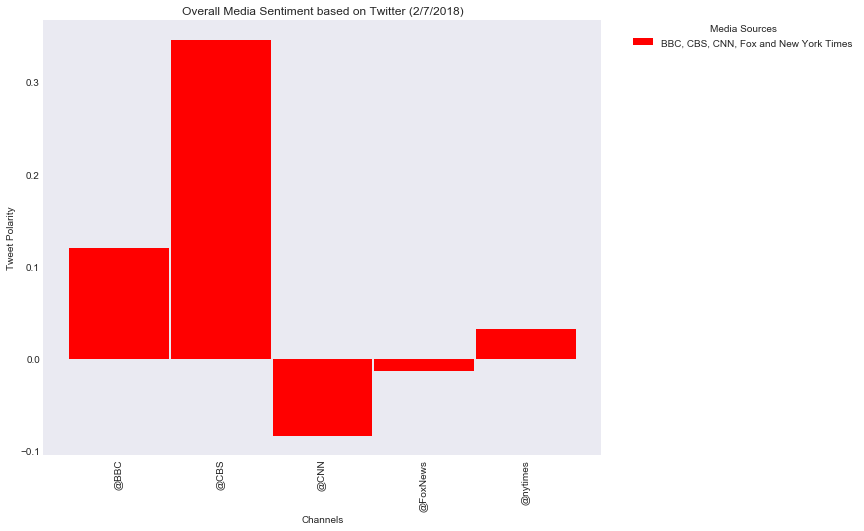

In [73]:
with plt.style.context("seaborn-dark"):
    news_mood_frame.plot(kind='bar', x="Source_Account", y="Compound", color='red', width=0.98, figsize=(10,8), 
                         label='BBC, CBS, CNN, Fox and New York Times') 
    plt.legend(loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0.,
        ncol=4, 
        fontsize=10, 
        scatterpoints=4, 
        title="Media Sources")
    plt.title("Overall Media Sentiment based on Twitter (2/7/2018)")
    plt.xlabel("Channels")
    plt.ylabel("Tweet Polarity")
    plt.savefig('news_plot_2.png', bbox_inches='tight')
    plt.show()